# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

### (1) 데이터 가져오기

In [2]:
df = load_diabetes()

df_x, df_y = df.data, df.target

### (2) 모델에 입력할 데이터 X 준비하기
### (3) 모델에 예측할 데이터 y 준비하기

In [3]:
df_x = np.array(df_x)
df_y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2)

학습률 차이를 비교하기 위해 리스트 형태로 저장

In [5]:
learning_rate = [1, 0.5, 0.1, 0.05, 0.01, 0.001]

### (5) 모델 준비하기
클래스 형식으로 저장   
(6) 손실함수 loss 정의하기   
(7) 기울기를 구하는 gradient 함수 구현하기   
(8) 하이퍼 파라미터인 학습률 설정하기

In [24]:
class MultiLinear:
    def __init__(self, learning_rate=0.001):
        self.w = None
        self.b = None
        self.lr = learning_rate
        self.losses = []
        self.weight_history = []
        self.bias_history = []

    def forward(self, x):
        y_pred = np.dot(x, self.w) + self.b
        return y_pred

    def loss(self, x, y):
        y_pred = self.forward(x)
        return np.mean((y_pred - y) ** 2)

    def gradient(self, x, y):
        y_pred = self.forward(x)
        w_grad = 2 * x * (y_pred - y)
        b_grad = 2 * (y_pred - y)
        return w_grad, b_grad

    def fit(self, x_data, y_data, epochs=20):
        self.w = np.random.randn(x_data.shape[1])
        self.b = 0
        for epoch in range(epochs):
            l = 0
            w_grad = np.zeros(x_data.shape[1])
            b_grad = 0

            for x, y in zip(x_data, y_data):
                l += self.loss(x, y)
                w_i, b_i = self.gradient(x, y)
                w_grad += w_i
                b_grad += b_i

            self.w -= self.lr * (w_grad / len(y_data))
            self.b -= self.lr * (b_grad / len(y_data))

            print(f'epoch ({epoch + 1}) ===> loss : {l / len(y_data):.5f}')
            self.losses.append(l / len(y_data))
            self.weight_history.append(self.w.copy())
            self.bias_history.append(self.b)

학습률에 따른 로스값 비교(그래프로)

epoch (1) ===> loss : 29442.31525
epoch (2) ===> loss : 29366.25607
epoch (3) ===> loss : 29292.63895
epoch (4) ===> loss : 29221.37943
epoch (5) ===> loss : 29152.39605
epoch (6) ===> loss : 29085.61022
epoch (7) ===> loss : 29020.94616
epoch (8) ===> loss : 28958.33074
epoch (9) ===> loss : 28897.69344
epoch (10) ===> loss : 28838.96623
epoch (11) ===> loss : 28782.08348
epoch (12) ===> loss : 28726.98190
epoch (13) ===> loss : 28673.60041
epoch (14) ===> loss : 28621.88012
epoch (15) ===> loss : 28571.76418
epoch (16) ===> loss : 28523.19779
epoch (17) ===> loss : 28476.12806
epoch (18) ===> loss : 28430.50397
epoch (19) ===> loss : 28386.27630
epoch (20) ===> loss : 28343.39757
epoch (21) ===> loss : 28301.82198
epoch (22) ===> loss : 28261.50533
epoch (23) ===> loss : 28222.40498
epoch (24) ===> loss : 28184.47980
epoch (25) ===> loss : 28147.69010
epoch (26) ===> loss : 28111.99759
epoch (27) ===> loss : 28077.36532
epoch (28) ===> loss : 28043.75766
epoch (29) ===> loss : 28011.

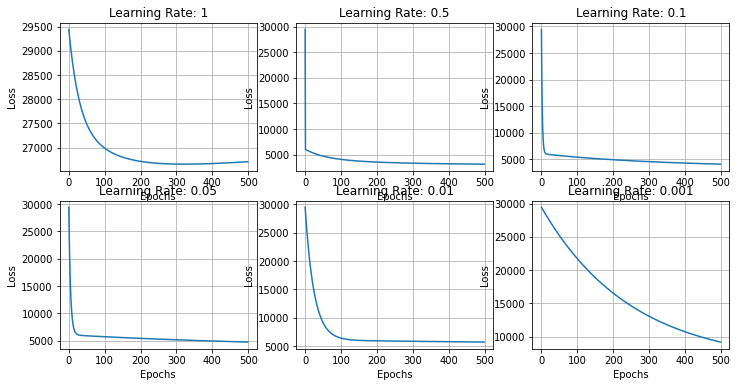

In [25]:
plt.figure(figsize = (12,6))
for i, lr in enumerate(learning_rate):
    model = MultiLinear(learning_rate=lr)
    model.fit(X_train, y_train, epochs=500)
    
    plt.subplot(2, 3, i + 1)
    plt.plot(model.losses)
    plt.title(f'Learning Rate: {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)

실험 결과, 학습률을 1로 두고 진행할 경우, 어느 지점에서 로스값이 커지는 것을 볼 수 있고, 0.001로 둔 경우, 천천히 진행되는 것을 볼 수 있다.

### (9) 모델 학습하기

In [32]:
model = MultiLinear(0.5)

model.fit(X_train, y_train, 1000)

epoch (1) ===> loss : 29461.97996
epoch (2) ===> loss : 6048.82406
epoch (3) ===> loss : 6010.66863
epoch (4) ===> loss : 5973.12358
epoch (5) ===> loss : 5936.17832
epoch (6) ===> loss : 5899.82242
epoch (7) ===> loss : 5864.04568
epoch (8) ===> loss : 5828.83803
epoch (9) ===> loss : 5794.18961
epoch (10) ===> loss : 5760.09073
epoch (11) ===> loss : 5726.53187
epoch (12) ===> loss : 5693.50368
epoch (13) ===> loss : 5660.99699
epoch (14) ===> loss : 5629.00275
epoch (15) ===> loss : 5597.51213
epoch (16) ===> loss : 5566.51640
epoch (17) ===> loss : 5536.00704
epoch (18) ===> loss : 5505.97563
epoch (19) ===> loss : 5476.41394
epoch (20) ===> loss : 5447.31386
epoch (21) ===> loss : 5418.66744
epoch (22) ===> loss : 5390.46685
epoch (23) ===> loss : 5362.70443
epoch (24) ===> loss : 5335.37264
epoch (25) ===> loss : 5308.46406
epoch (26) ===> loss : 5281.97143
epoch (27) ===> loss : 5255.88759
epoch (28) ===> loss : 5230.20553
epoch (29) ===> loss : 5204.91835
epoch (30) ===> loss :

### (10) test 데이터에 대한 성능 확인하기

In [33]:
mse = model.loss(X_test, y_test)


In [34]:
mse

2349.6793345045207

test 데이터 성능 평가

### (11) 정답 데이터와 예측한 데이터 시각화하기

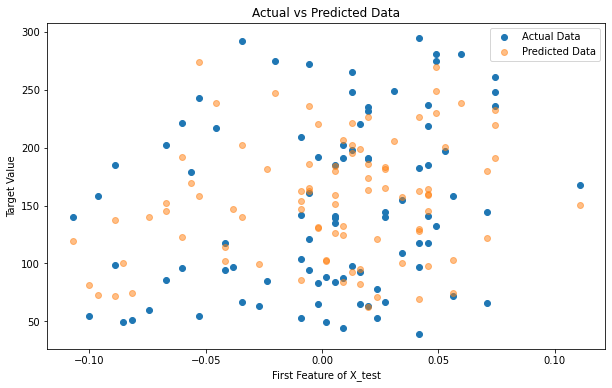

In [36]:
y_pred = model.forward(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Actual Data')
plt.scatter(X_test[:, 0], y_pred, label='Predicted Data', alpha=0.5)
plt.xlabel('First Feature of X_test')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.show()